This notebook reviews the exercise of finding the line that best describes a set of datapoints by minimizing the $\chi^2$ between the data and the linear model.  As an example, we use measurements of stars' masses and radii, and try to find the relationship between them.

The "%matplotlib inline" allows us to generate plots as we go along.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


**Exercise 1**

We read in a table which has columns of mass (in solar masses), radius (in solar radii), and the errors in those two quantities.  In this file, comments are denoted by semicolons and the values are separated by commas.

In [2]:
data = np.loadtxt('Lopez-Morales07_table1.txt', comments=';', delimiter=',')
Mstar = data[:,0]
Merr = data[:,1]
Rstar = data[:,2]
Rerr = data[:,3]

Let's plot the data to see what it looks like!  Note that matplotlib can use latex notation, hooray!

<Container object of 3 artists>

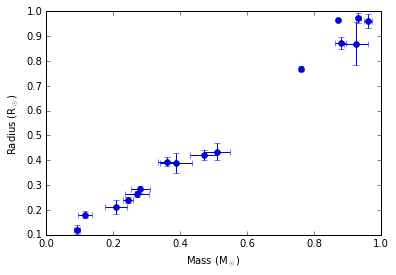

In [3]:
plt.xlabel('Mass (M$_\odot$)')
plt.ylabel('Radius (R$_\odot$)')
plt.errorbar(Mstar, Rstar, xerr=Merr, yerr=Rerr, fmt='o')

This data looks like it might be well-described by a straight line, y = a0 + a1 x.  We want to find the values of a0 and a1 that fit the data best.

One way to describe the difference between a model and data is by $\chi^2$ ("chi-squared"), defined as

$\chi^2 = \sum_i \frac{(\rm{model}(x_i) - \rm{data}(x_i))^2}{\sigma_i^2}$

The skeleton of a function to calculate $\chi^2$ is below.  **To do:** Implement this function.  

(Hints: 
- If you use the function np.sum which sums over all the elements in an array, it is only one line!  
- Recall that exponentiation in Python uses the operator \*\*, not ^.  
- For now we will only consider the errors in the y-values - we'll figure out how to deal with 2d errors later!)

In [7]:
def chi2(A0, A1, X, D, SIG): 
    ''' Calculates chi^2 between the data (X, D) and the line described by y = A0 + A1*x
    
        Input
        =====
        A0 : y-intercept of the model
        A1 : slope of the model
        X : array of x-values from the data
        D : array of y-values from the data
        SIG : the expected variance of the y-values
            (could be a single value, or an array of the same length as X and D)
    '''
    chi2 = np.sum((A0 + A1*X - D)**2/SIG**2)
    return chi2 

Now we can use $\chi^2$ to quantify the goodness-of-fit between the model and data.  The code below defines a set of x-data, a slope, and an intercept, and calculates the corresponding y-values. 

In [14]:
xplot = np.linspace(0,1,20)
a0 = 0.0    # y-intercept
a1 = 1.0    # slope
yplot = a0 + a1*xplot

This code plots the line we just defined on top of the data.  It also calculates $\chi^2$ using the function you just defined, and quotes the value in the top left panel.

**To do:** Try playing around with the values of a0 and a1, and see how small of a $\chi^2$ you can get!

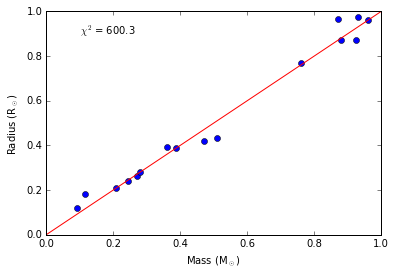

In [17]:
plt.xlabel('Mass (M$_\odot$)')
plt.ylabel('Radius (R$_\odot$)')
plt.plot(Mstar, Rstar, 'o', color='blue')
plt.plot(xplot,yplot,color='red')
plt.text(0.1, 0.9, "$\chi^2$ = " + "{:.1f}".format(chi2(a0,a1,Mstar,Rstar,Rerr)))

**Exercise 2**

Obviously, manually playing around with a0 and a1 is not the most efficient way to find the best values.  Instead, let's define a grid of a0 and a1 values, and see which has the smallest $\chi^2$.

The code below initializes arrays of a0 and a1, as well as an empty array for the corresponding $\chi^2$ values.  
**To do:** Fill in the $\chi^2$ array by iterating over the a0, a1 values.

In [20]:
a0grid = np.linspace(-0.5, 0.5, 100)
a1grid = np.linspace(0.5, 1.5, 100)
chi2grid = np.zeros((100,100))


for num0 in a0grid:
    for num1 in a1grid:
        row= np.where(a0grid == num0)[0]
        col= np.where(a1grid == num1)[0]
        chi2grid[row,col]=chi2(num0, num1, Mstar, Rstar, Rerr)

Execute the code below to produce an image of your $\chi^2$ grid.  (The flips and transpositions are there to make the image display in the proper orientation... I don't know why Python is like this.)

How close was your eyeball estimate from earlier to the minimum $\chi^2$?

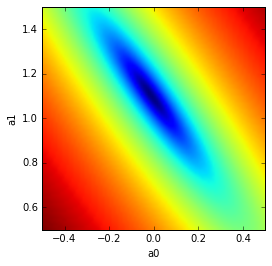

In [21]:
plt.imshow(np.flipud(np.log10(chi2grid).T), extent=[-0.5, 0.5, 0.5, 1.5])
plt.xlabel('a0')
plt.ylabel('a1')

The np.argmin() function gives you the index of the minimum value of $\chi^2$ within the array.  Unfortunately, this is a "flattened" index, which means that rather than an (i,j) for the (row, column), it just gives you a (k) out of (row\*column).  However, since our chi2grid array has a shape of 100x100, this conveniently means that the first two digits of the index are the row, and the last two are the column.  (Think about why this is so!)

In [27]:
print(np.argmin(chi2grid))
print chi2grid

4860
[[ 94071.32109109  92587.49542327  91116.04812327 ...,   7773.91192583
    7490.78793746   7220.04231692]
 [ 92030.43398368  90562.1953498   89106.33508376 ...,   7244.96711192
    6977.43015751   6722.27157092]
 [ 90012.8324964   88560.18089649  87119.9076644  ...,   6739.30791816
    6487.35799769   6247.78644506]
 ..., 
 [  4523.1190591    4551.23568478   4591.73067829 ...,  64884.11236375
   66112.93066888  67354.12734184]
 [  4740.93710559   4784.64076522   4840.72279268 ...,  66613.87270374
   67858.27804283  69115.06174974]
 [  4982.04077222   5041.33146581   5113.00052722 ...,  68366.91866387
   69626.91103691  70899.28177778]]


**To do:** Find the values of a0 and a1 that correspond to this location.  

In [28]:
# FINISH THESE LINES
a0min = a0grid[int((str(np.argmin(chi2grid)))[0:2])]
a1min = a1grid[int((str(np.argmin(chi2grid)))[2:])]
print(a0min, a1min)

(-0.015151515151515138, 1.106060606060606)


Now let's plot this location on top of the image from earlier.  If everything has come out right, we should get a red dot right on top of the $\chi^2$ minimum!

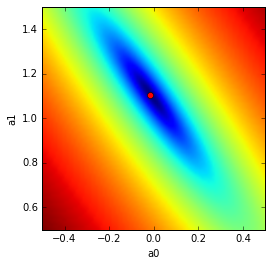

In [29]:
plt.axis([-0.5, 0.5, 0.5, 1.5])
plt.imshow(np.flipud(np.log10(chi2grid).T), extent=[-0.5, 0.5, 0.5, 1.5])
plt.xlabel('a0')
plt.ylabel('a1')
plt.plot([a0min], [a1min], 'o', color='red')

Finally, let's check out how our model looks in comparison to the data.  
**To do:** Define a line using your best-fit values, and plot it over the data below!

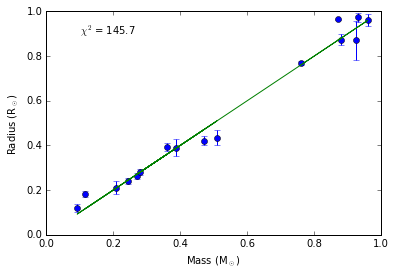

In [31]:
plt.xlabel('Mass (M$_\odot$)')
plt.ylabel('Radius (R$_\odot$)')
plt.errorbar(Mstar, Rstar, yerr=Rerr, fmt='o', color='blue')
plt.text(0.1, 0.9, "$\chi^2$ = " + "{:1.1f}".format(chi2(a0min,a1min,Mstar,Rstar,Rerr)))

# YOUR CODE HERE
plt.plot(Mstar, a0 + a1*Mstar,'g')

**Exercise 3**

Let's use linear algebra to find the exact solution!  We've just figured out that 

$$ 
\begin{bmatrix}
a_0 \\
a_1 
\end{bmatrix}
= 
\frac{1}{\Delta}
\begin{bmatrix}
\sum x_i^2/\sigma_i^2 & - \sum x_i/\sigma_i^2 \\
-\sum x_i/\sigma_i^2 & \sum 1/\sigma_i^2 
\end{bmatrix}
\begin{bmatrix}
\sum y_i^2/\sigma_i^2 \\
-\sum x_i y_i/\sigma_i^2 
\end{bmatrix}
$$

where $\Delta = (\sum x_i^2/\sigma_i^2)(\sum 1/\sigma_i^2) - (\sum x_i/\sigma_i^2)^2$ is the determinant of the square matrix.

**To do:** Compute all of the necessary sums for our data.  I've done the first two for you.

In [60]:
nothingsum = np.sum(1./Rerr**2)
xsum = np.sum(Mstar/Rerr**2)
# FINISH THESE LINES
x2sum = np.sum(Mstar**2/Rerr**2)
ysum = np.sum(Rstar/Rerr**2)
xysum = np.sum(Mstar*Rstar/Rerr**2)

**To do:** Compute the determinant $\Delta$.

In [61]:
# FINISH THIS LINE
determinant = x2sum*nothingsum - xsum**2

**To do:** Compute $a_0$ and $a_1$!  How do they compare to your earlier values?

In [62]:
# FINISH THESE LINES
a0lin = (x2sum*ysum - xsum*xysum)/determinant
a1lin = (-xsum*ysum + nothingsum*xysum)/determinant

In [63]:
print(a0lin, a0min)

(-0.013254169014059613, -0.015151515151515138)


In [64]:
print(a1lin, a1min)

(1.1029657040861613, 1.106060606060606)
